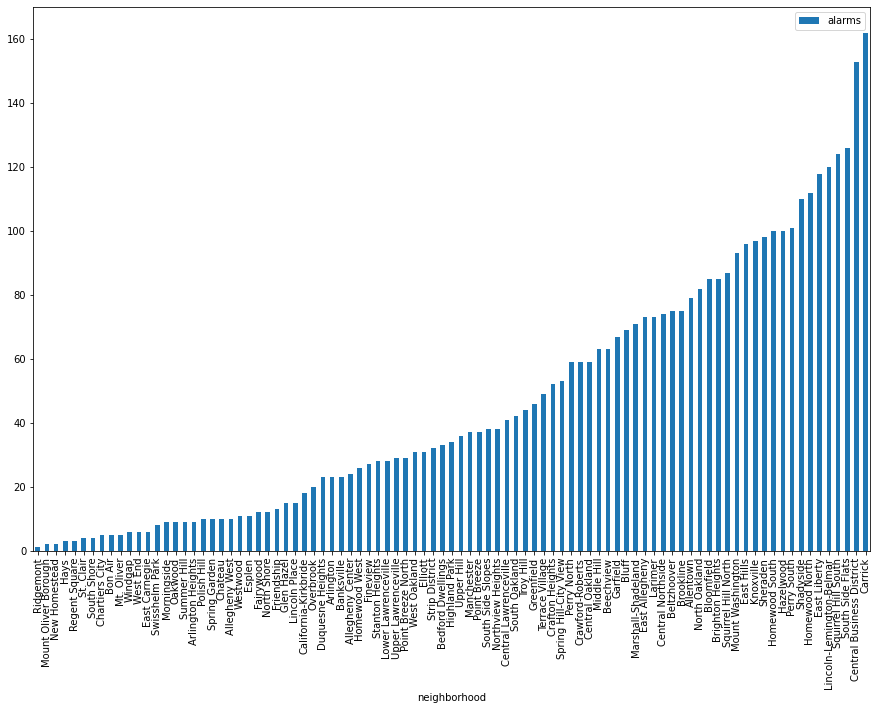

In [37]:
import pandas as pd
%matplotlib inline

fireData = pd.read_csv("fire.csv")

df = fireData[['neighborhood', 'alarms']].groupby(by='neighborhood').sum().sort_values(by ='alarms')

df.plot(kind = 'bar', figsize=(15,10))

,alarms
neighborhood,
Ridgemont,1
Mount Oliver Borough,2
New Homestead,2
Hays,3
Regent Square,3
...,...
Lincoln-Lemington-Belmar,120
Squirrel Hill South,124
South Side Flats,126


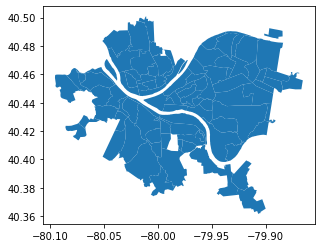

In [44]:
import shapely as shp
import matplotlib as plt
import geopandas as gpd

neighborhood_shapes = gpd.read_file("Neighborhoods_.geojson")
neighborhood_shapes.plot()

# Function which returns the neigborhood that a geographical location falls in
# This is used to combine the datasets
def getNeighborhood(latitude, longitude):
    Point = shp.geometry.Point(longitude,latitude)
    # For each row in the shape data
    for _,x in neighborhood_shapes.iterrows():
        #Test if the point is within that neighborhood
        if(point.within(x["geometry"])):
            return x["hood"]
    
    return ""

In [45]:
neighborhoods = []

for _, row in fireData.iterrows():
    neighborhoods.append(getNeighborhood(row["latitude"],row["longitude"]))

NameError: name 'point' is not defined

In [46]:
geometry=[Point(xy) for xy in zip(fireData["longitude"], fireData["latitude"])]

crs={'init':'epsg:4326'}
geo = gpd.GeoDataFrame(fireData,crs=crs,geometry=geometry)

fig = plt.pyplot.gcf()
fig.set_size_inches(50.5, 18.5,forward = True)

plot =  geo.append(neighborhood_shapes).plot()

for point, label in zip(geometry, fireData["neighborhoods"]):
    plot.annotate(label, xy=(point.x, point.y), xytext=(3, 3), textcoords="offset points")

NameError: name 'Point' is not defined

In [48]:
import pandas as pd
import geopandas
%matplotlib inline

In [49]:
# import dataset
fireData1 = pd.read_csv("fire.csv")
# filter to important info
alarms = fireData1.groupby("neighborhood").sum()['alarms']
alarms.sort_values(ascending=False)

neighborhood
Carrick                      162
Central Business District    153
South Side Flats             126
Squirrel Hill South          124
Lincoln-Lemington-Belmar     120
                            ... 
Regent Square                  3
Hays                           3
New Homestead                  2
Mount Oliver Borough           2
Ridgemont                      1
Name: alarms, Length: 91, dtype: int64

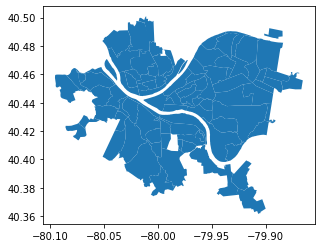

In [51]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

In [54]:
alarms_map = neighborhoods.merge(alarms, how='left', left_on='hood', right_on='neighborhood')

alarms_map[['hood','alarms','geometry']].head()

,hood,alarms,geometry
0,Central Oakland,59,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,82,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,31,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,59,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,32,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


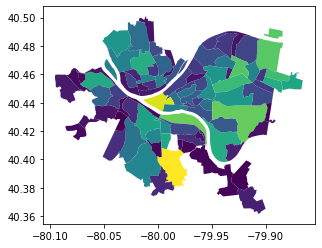

In [56]:
alarms_map.plot(column='alarms')